In [1]:
# Import Libraries.
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.preprocessing import OrdinalEncoder
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['font.size'] = 6.0

In [12]:
# Define Functions.

# Print Top Words for Topics.
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        content = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        message = "Topic #%d: " % topic_idx
        message += " ".join(content)
        print(message)
    print()
    

# Store List of Top Words.
def content_list(model, feature_names, n_top_words):
    all_content = []
    for topic in model.components_:
        content = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        all_content.append(content)
    return all_content

In [3]:
# Import Data.
filename = 'wiki_movie_plots_deduped.csv'
data = pd.read_csv(filename, sep=',',header=0,index_col=False)

In [4]:
# Parameters.
n_features = 500 # amount of distinct words / vocabulary
n_components = 9 # amount of topics
n_top_words = 20 # highest frequency words in topics

In [5]:
# Term Frequency-Inverse Document Frequency (Matrix Calculation).
samples = data.Plot # text samples
labels = OrdinalEncoder().fit_transform(np.array(data.Genre).reshape(-1,1)) # genres

# Convert a collection of raw documents to a matrix of TF-IDF features (samples x features).
# tf-idf: relative frequency of a word in a document weighted by the discriminancy of a word between document classes
tfidf_vectorizer = TfidfVectorizer(max_df=0.30, min_df=2,max_features=n_features,stop_words='english')

# Convert a collection of text documents to a matrix of token counts.
#tf_vectorizer = CountVectorizer(max_df=0.95, min_df=4,max_features=n_features,stop_words='english')

# Fit-Transform.
tfidf = tfidf_vectorizer.fit_transform(samples) # term frequency weighted by document discriminancy, samples x features 
# tf = tf_vectorizer.fit_transform(samples) # term frequency, samples x features 

In [13]:
# Non-negative Matrix Factorization.
nmf =  NMF(n_components=n_components, random_state=1,beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.4,l1_ratio=.5)

# Fit NMF.
nmf.fit(tfidf)

# Print Top Words for Topics.
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)
c_list = content_list(nmf, tfidf_feature_names, n_top_words)

In [44]:
# Latent Dirichlet Allocation.
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,learning_method='online',learning_offset=50,random_state=1)

# Fit LDA.
lda.fit(tfidf)

# Print Top Words for Topics.
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(lda, tfidf_feature_names, n_top_words)

Topic #0: king war raj army group japanese battle earth world ship men island british soldiers killed attack captain mission escape kill
Topic #1: father family mother son village daughter marriage story married house girl wife gets comes day marry man sister brother home
Topic #2: film story played bob plot lead family follows set woman young tells marriage told black human including meets takes ben
Topic #3: joe house car tells home john man police room money night johnny new finds frank mr jim mike tony mrs
Topic #4: ravi jerry falls vijay runs woman raj bomb caught mark eddie boys battle alex shoot arrest escapes causing revenge general
Topic #5: tom jack team film movie new school game charlie young max story play star world music town friends club girl
Topic #6: raja paul nick steve british affair fight gang revenge agent prison officer raj don tries girlfriend sent man american van
Topic #7: sam mary anna chris billy henry martin king frank jane doctor woman wife alex husband ma

In [45]:
# Singular Value Decomposition.
svd = TruncatedSVD(n_components=n_components)

# Fit SVD.
svd.fit(tfidf)

# Print Top Words for Topics.
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(svd, tfidf_feature_names, n_top_words)

Topic #0: father family man mother house police film son home tells wife new daughter finds day young gets goes money story
Topic #1: family father mother son marriage village daughter married story marry girl sister parents brother comes husband rich child raja house
Topic #2: film story war movie world young set played plot village british american people star japanese follows new lead woman army
Topic #3: village police son gang killed officer brother kill murder story kills men raja inspector man king death revenge daughter killing
Topic #4: police film money murder gang car story house joe inspector case crime gets killer detective man bank apartment job movie
Topic #5: tom wife jerry man family john husband son woman jack young mary murder joe paul daughter war dr affair mrs
Topic #6: tom jerry village school father gang police team story students college joe friends high student girl raja teacher group boys
Topic #7: family father son team gang school police brother film joe jac

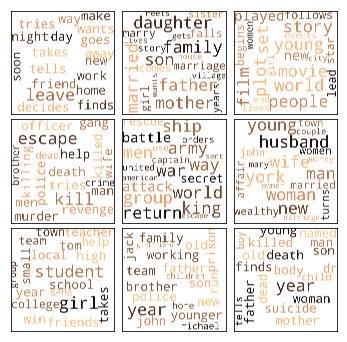

In [43]:
# Word Cloud for Topics.

f, ax = plt.subplots(3, 3,figsize=(2*2.95,2*2.95),sharex=True, sharey=True)
ax = np.ravel(ax)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=0.05, hspace=0.05)
for i,content in enumerate(c_list):
    wordcloud = WordCloud(max_font_size=800,max_words=20,background_color='white',colormap=plt.cm.copper,width=5000,height=5000,mode='RGB',scale=1).generate(' '.join(content))
    axi = ax[i]
    axi.imshow(wordcloud,interpolation='bilinear')
    plt.xticks(())
    plt.yticks(())
    
plt.savefig('word_cloud',dpi=900,transparent=True,orientation='landscape',bbox_inches='tight')
plt.savefig('word_cloud',dpi=900,transparent=True,orientation='landscape',bbox_inches='tight',format='pdf')
plt.show()